In [ ]:
#dimensionality reduction with factor analysis applied to student performance data set

#load data
#preprocessing
    #feature selection
    #deature encoding
    #assumptions
#exploratory factor analysis

# Import the Libraries

In [ ]:
import numpy as np
import pandas as pd

# Load the data

In [ ]:
data = pd.read_csv("student-mat.csv")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Here, we can see that there are 33 different variables in the given dataset.

In [ ]:
data.school.unique()

array(['GP', 'MS'], dtype=object)

We can drop the school column becasue it is of no use to us.

In [ ]:
data = data.drop("school", axis=1)

# Printing all the column's unique data

In [ ]:
print(data.apply(lambda col: col.unique()))

sex                                                      [F, M]
age                            [18, 17, 15, 16, 19, 22, 20, 21]
address                                                  [U, R]
famsize                                              [GT3, LE3]
Pstatus                                                  [A, T]
Medu                                            [4, 1, 3, 2, 0]
Fedu                                            [4, 1, 2, 3, 0]
Mjob                [at_home, health, other, services, teacher]
Fjob                [teacher, other, services, health, at_home]
reason                        [course, other, home, reputation]
guardian                                [mother, father, other]
traveltime                                         [2, 1, 3, 4]
studytime                                          [2, 3, 1, 4]
failures                                           [0, 3, 2, 1]
schoolsup                                             [yes, no]
famsup                                  

# Ordinal encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder , StandardScaler

In [ ]:
def ordinal_encode(series, categories):
    encoder = OrdinalEncoder(categories=categories, dtype=np.int64)
    return encoder.fit_transform(series.values.reshape(-1,1))

In [ ]:
categories_ordenc = {"sex" : [["F", "M"]],
                    "address" : [["R", "U"]],
                    "famsize" : [["LE3", "GT3"]],
                    "Pstatus" : [["A", "T"]],
                    "schoolsup" : [["no", "yes"]],
                    "famsup" : [["no", "yes"]],
                    "paid" : [["no", "yes"]],
                    "activities" : [["no", "yes"]],
                    "nursery" : [["no", "yes"]],
                    "higher" : [["no", "yes"]],
                    "internet" : [["no", "yes"]],
                    "romantic" : [["no", "yes"]],
                    }
for column, category in categories_ordenc.items():
    data[column] = ordinal_encode(data[column], category)

In [ ]:
print(data.apply(lambda col: col.unique()))

sex                                                      [0, 1]
age                            [18, 17, 15, 16, 19, 22, 20, 21]
address                                                  [1, 0]
famsize                                                  [1, 0]
Pstatus                                                  [0, 1]
Medu                                            [4, 1, 3, 2, 0]
Fedu                                            [4, 1, 2, 3, 0]
Mjob                [at_home, health, other, services, teacher]
Fjob                [teacher, other, services, health, at_home]
reason                        [course, other, home, reputation]
guardian                                [mother, father, other]
traveltime                                         [2, 1, 3, 4]
studytime                                          [2, 3, 1, 4]
failures                                           [0, 3, 2, 1]
schoolsup                                                [1, 0]
famsup                                  

In [ ]:
data

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,1,1,0,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,0,17,1,1,1,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,0,15,1,0,1,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,0,15,1,1,1,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,0,16,1,1,1,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,0,0,2,2,services,services,course,...,5,5,4,4,5,4,11,9,9,9
391,1,17,1,0,1,3,1,services,services,course,...,2,4,5,3,4,2,3,14,16,16
392,1,21,0,1,1,1,1,other,other,course,...,5,5,3,3,3,3,3,10,8,7
393,1,18,0,0,1,3,2,services,other,course,...,4,4,1,3,4,5,0,11,12,10


# onehot encoding


In [ ]:
def onehot_encode(data, column, categories):
    encoder = OneHotEncoder(categories= categories , drop= "first", sparse=False , dtype=np.int64)
    encoded_features = encoder.fit_transform(data[column].values.reshape(-1,1))
    encoder.transform(data[column].values.reshape(-1,1))

    data = data.drop(labels=column, axis=1)

    for j, category in enumerate(categories[0][1:]):
        category_column_name = "{}_{}".format(column,category)
        data[category_column_name]=encoded_features[:,j]
    return data

In [ ]:
categories_hotenc = {"Fjob" : [["other","teacher","health","services","at_home"]],
                     "Mjob" : [["other","teacher","health","services","at_home"]],
                     "reason" : [["other","home","reputation","course"]],
                     "guardian" : [["other","mother","father"]],}
for column, category in categories_hotenc.items():
    data = onehot_encode(data,column,category)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

In [ ]:
print(data.apply(lambda col: col.unique()))

sex                                                             [0, 1]
age                                   [18, 17, 15, 16, 19, 22, 20, 21]
address                                                         [1, 0]
famsize                                                         [1, 0]
Pstatus                                                         [0, 1]
Medu                                                   [4, 1, 3, 2, 0]
Fedu                                                   [4, 1, 2, 3, 0]
traveltime                                                [2, 1, 3, 4]
studytime                                                 [2, 3, 1, 4]
failures                                                  [0, 3, 2, 1]
schoolsup                                                       [1, 0]
famsup                                                          [0, 1]
paid                                                            [0, 1]
activities                                                      [0, 1]
nurser

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sex                395 non-null    int64
 1   age                395 non-null    int64
 2   address            395 non-null    int64
 3   famsize            395 non-null    int64
 4   Pstatus            395 non-null    int64
 5   Medu               395 non-null    int64
 6   Fedu               395 non-null    int64
 7   traveltime         395 non-null    int64
 8   studytime          395 non-null    int64
 9   failures           395 non-null    int64
 10  schoolsup          395 non-null    int64
 11  famsup             395 non-null    int64
 12  paid               395 non-null    int64
 13  activities         395 non-null    int64
 14  nursery            395 non-null    int64
 15  higher             395 non-null    int64
 16  internet           395 non-null    int64
 17  romantic        

In [ ]:
data

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_at_home,Mjob_teacher,Mjob_health,Mjob_services,Mjob_at_home,reason_home,reason_reputation,reason_course,guardian_mother,guardian_father
0,0,18,1,1,0,4,4,2,2,0,...,0,0,0,0,1,0,0,1,1,0
1,0,17,1,1,1,1,1,1,2,0,...,0,0,0,0,1,0,0,1,0,1
2,0,15,1,0,1,1,1,1,2,3,...,0,0,0,0,1,0,0,0,1,0
3,0,15,1,1,1,4,2,1,3,0,...,0,0,1,0,0,1,0,0,1,0
4,0,16,1,1,1,3,3,1,2,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,0,0,2,2,1,2,2,...,0,0,0,1,0,0,0,1,0,0
391,1,17,1,0,1,3,1,2,1,0,...,0,0,0,1,0,0,0,1,1,0
392,1,21,0,1,1,1,1,1,1,3,...,0,0,0,0,0,0,0,1,0,0
393,1,18,0,0,1,3,2,3,1,0,...,0,0,0,1,0,0,0,1,1,0


# Dividing data

In [ ]:
x = data.drop(labels=["G1","G2","G3"], axis =1)
y = data[["G3"]]

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sex                395 non-null    int64
 1   age                395 non-null    int64
 2   address            395 non-null    int64
 3   famsize            395 non-null    int64
 4   Pstatus            395 non-null    int64
 5   Medu               395 non-null    int64
 6   Fedu               395 non-null    int64
 7   traveltime         395 non-null    int64
 8   studytime          395 non-null    int64
 9   failures           395 non-null    int64
 10  schoolsup          395 non-null    int64
 11  famsup             395 non-null    int64
 12  paid               395 non-null    int64
 13  activities         395 non-null    int64
 14  nursery            395 non-null    int64
 15  higher             395 non-null    int64
 16  internet           395 non-null    int64
 17  romantic        

In [ ]:
y

,G3
0,6
1,6
2,10
3,15
4,10
...,...
390,9
391,16
392,7
393,10


# OUTLIERS

In [ ]:
# to find outliers , outliers are the values who differ greatly in the data as compared to the others
# hence we see if the z_scores of every entity is greater than 3 or not.

def detect_outlier(df):
    flag_outlier = False
    for feature in df:
        column = df[feature]
        mean = np.mean(column)
        std = np.std(column)
        z_scores = (column-mean)/ std
        outliers = np.abs(z_scores) > 3
        n_outliers = sum(outliers)
        if n_outliers>0:
            print("{} has {} outliers".format(column,n_outliers))
            flag_outlier = True
        if ~flag_outlier:
            print("The dataset has no outliers.")
        return None
detect_outlier(x)

The dataset has no outliers.


# Sample size

The ideal sample size should be 20 samples per variable, if we have 38 variables , we should have 30 into 20 samples
the min sample size is 1:5 instead of 1:20
Here we have 395 samples which is less than ideal but more than min.


In [ ]:
import matplotlib.pyplot as plt

# Linear relations

There are no linear relations in the dataset

<ipython-input-23-372d00dfcbc4>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  x.hist(ax=ax)


[]

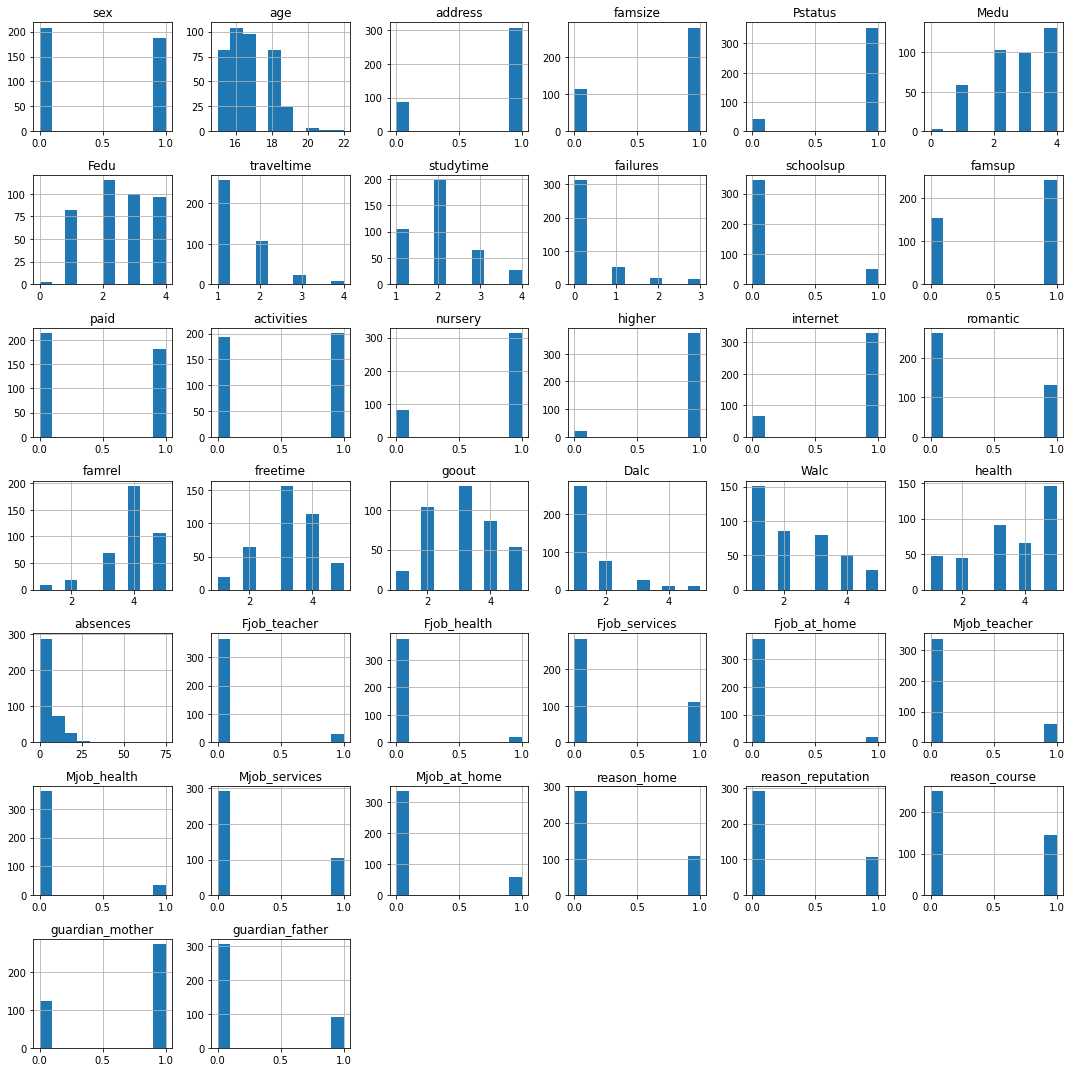

In [ ]:
fig, ax=plt.subplots(figsize=(15,15))
x.hist(ax=ax)

plt.tight_layout()
plt.plot()

# Factorability

# correlation matrix

In [ ]:
import seaborn as sns



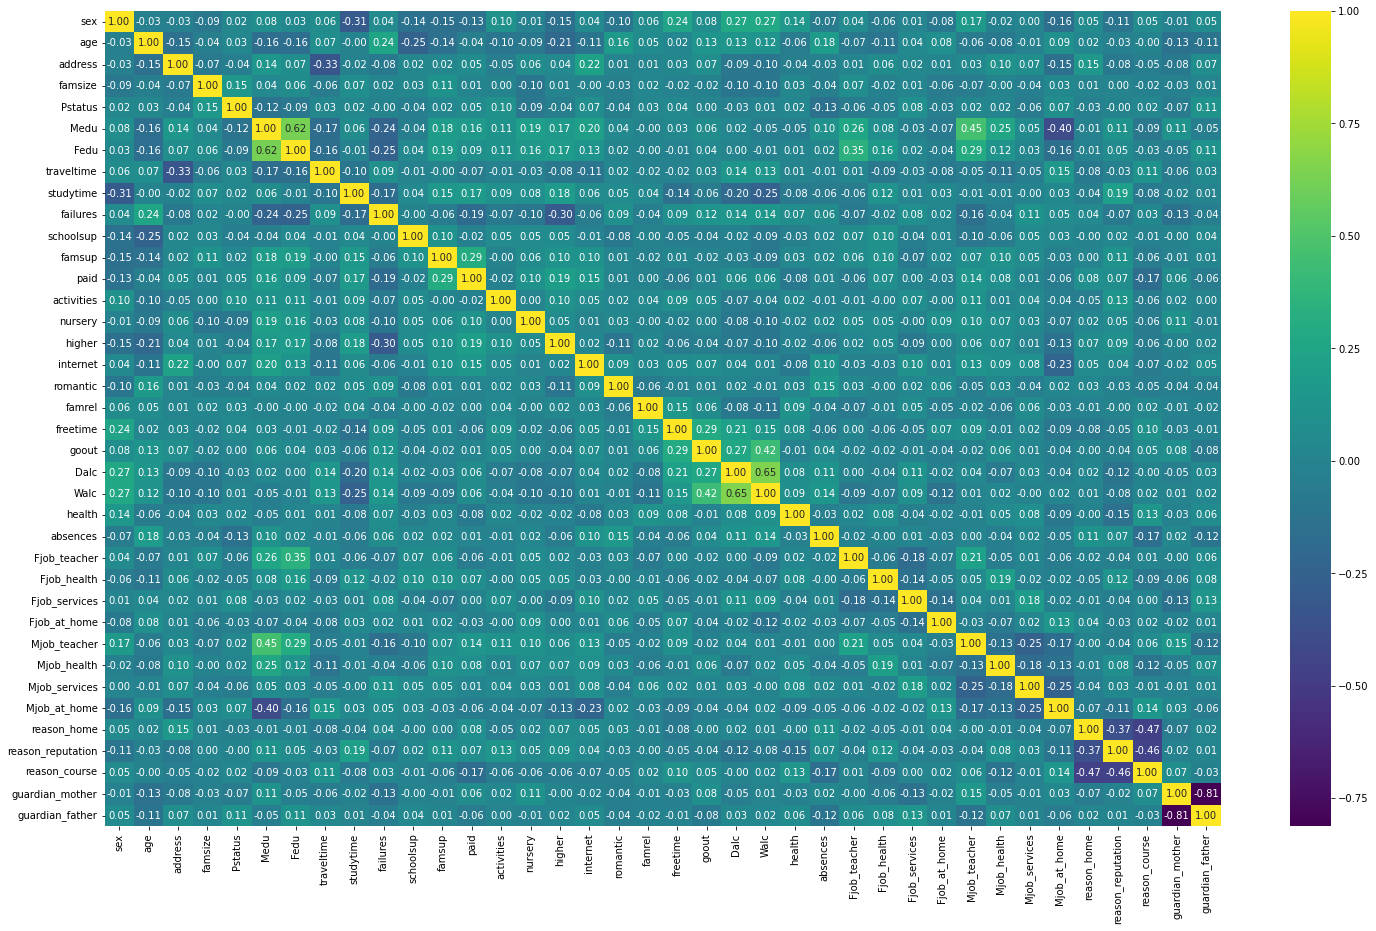

In [ ]:
fig, ax = plt.subplots(figsize=(25,15))

ax = sns.heatmap(x.corr(), annot = True , fmt=".2f", cmap="viridis", ax=ax)
plt.show()

commonality is assosiated with variables
eigenvalues are assosiated with the factors v1=lamdaF1+lamdaF2+e1 (eignvector for variable v1 having factorF1, lamda is correlation)
commonality is the variance explained in the variable by the extracted factors (lamda11^2 + lamda21^2)
eigen values (summation of square of lamdas for each factors )

#BARLETT TEST

#KMO

In [ ]:
!pip install factor_analyzer

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 KB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.3/202.3 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 37.7 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=46c94e5c8fd016fffe776d584222bc26fd30b376179176ece115dc25071376f7
  Stored in directory: /root/.cache/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor_analyzer


In [ ]:
kmo_all , kmo_model = calculate_kmo(x)

/usr/local/lib/python3.9/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [ ]:
print("Overall KMO = {:.3f}".format(kmo_model))
print("KMO per feature :\n{}".format(kmo_all.round(3)))

Overall KMO = 0.491
KMO per feature :
[0.694 0.52  0.578 0.436 0.565 0.597 0.619 0.643 0.639 0.644 0.545 0.64
 0.648 0.559 0.622 0.647 0.63  0.464 0.436 0.608 0.58  0.604 0.596 0.494
 0.539 0.477 0.384 0.316 0.386 0.425 0.302 0.269 0.655 0.255 0.306 0.321
 0.438 0.442]


In [ ]:
kmo_passed = list(x.columns[kmo_all >= 0.5])
kmo_passed

['sex',
 'age',
 'address',
 'Pstatus',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'absences',
 'Mjob_at_home']

In [ ]:
kmo_failed = list(x.columns[kmo_all < 0.5])
kmo_failed

['famsize',
 'romantic',
 'famrel',
 'health',
 'Fjob_teacher',
 'Fjob_health',
 'Fjob_services',
 'Fjob_at_home',
 'Mjob_teacher',
 'Mjob_health',
 'Mjob_services',
 'reason_home',
 'reason_reputation',
 'reason_course',
 'guardian_mother',
 'guardian_father']

In [ ]:
x_kmo = x[kmo_passed]

In [ ]:
x = x_kmo.copy()

In [ ]:
len(kmo_passed)

22

#exploratory factor analysis

In [ ]:
def train_factor_model(dataset, number_of_factors , rotation = "varimax"):
  factor_model = FactorAnalyzer(n_factors = number_of_factors, rotation = rotation)
  factor_model.fit(dataset)

  return factor_model

In [ ]:
def scree_plot(eigenvalues, n_columns):
  plt.style.use("fivethirtyeight")
  fig, ax = plt.subplots(figsize = (10,6))

  ax.scatter(range(1,n_columns + 1),eigenvalues, s=50)
  ax.plot(range(1,n_columns + 1),eigenvalues)

  ax.set_title('Scree Plot')
  ax.set_xlabel('Factors')
  ax.set_ylabel('EigenValues')

  ax.grid(False)

  ax.axhline(y = 1, linestyle = "--",color = "grey", linewidth = 1)
  #plt.savefig("scree_plot.png",transparent = True, dpi = 600)
  plt.show()

In [ ]:
factor_model = train_factor_model(x, len(x.columns), rotation = "oblimin")
#oblimin is constrained to 90 deg
#rotation can be changed at runtime

In [ ]:
eigenvalues, common_factor_eigenvalues = factor_model.get_eigenvalues()

In [ ]:
eigenvalues

array([2.88143473, 2.36397703, 1.49455521, 1.37878752, 1.31015964,
       1.19688253, 1.09258507, 1.05011049, 1.01469519, 0.90518769,
       0.89645237, 0.78506175, 0.7736879 , 0.75093821, 0.71202434,
       0.61761662, 0.60398935, 0.57106196, 0.52453711, 0.48659866,
       0.31362068, 0.27603595])

In [ ]:
def loadings_plot(loadings, variables):
  # Create loadings plot using matplotlib
  fig,ax = plt.subplots(figsize = (15,5))

  image = ax.matshow(loadings, cmap = "hot")

  n_factors - loadings.shape[1]
  factors = ["Factors{}".format(index) for index in range(n_factors)]

  ax.set_yticklabels([""] + variables, fontsize= 10)
  ax.set_xticklabels([""] + factors, rotation = "vertical", fontsize = 10)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.grid(False)

  plt.colorbar(image)
  plt.tight.layout()
  plt.show()

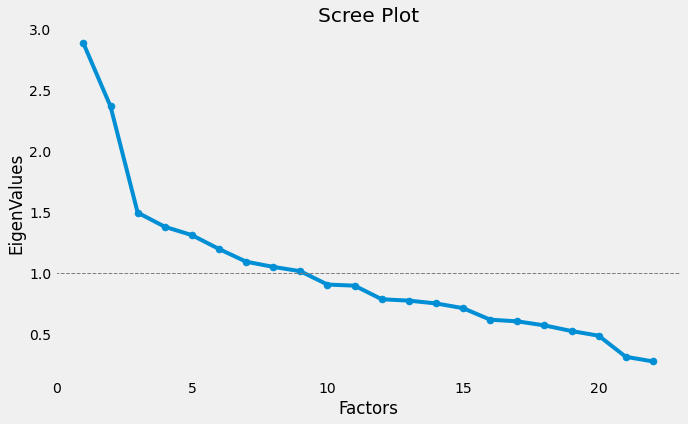

In [ ]:
n_columns = len(x.columns)
scree_plot(eigenvalues, n_columns = n_columns)

about 9 factors to be selcted as they have eigenvalues above or = 1
#using kaiser criterion

In [ ]:
number_of_factors = sum(eigenvalues > 1)
factor_model = train_factor_model(x, number_of_factors, rotation = "promax")

In [ ]:
number_of_factors

9

check association of factors with variables



In [ ]:
seed = 42
x_latent = factor_model.transform(x)
x_latent

array([[-1.04452132,  0.95122951,  1.42715157, ..., -0.31208422,
         0.03032271,  1.49617951],
       [-0.98556429, -1.53564069,  1.60387641, ...,  0.09434685,
        -0.23483935, -0.01177792],
       [ 0.29486765, -1.6839818 ,  1.50531429, ..., -1.34985842,
        -0.4544243 ,  0.75202092],
       ...,
       [ 0.92904463, -1.89861453,  0.45983935, ...,  2.25997839,
         0.66766373,  0.25028657],
       [ 1.77201732, -0.21159098, -0.317039  , ...,  1.02218474,
        -0.88817504, -0.36192342],
       [ 1.02869915, -1.40991468,  0.1864788 , ...,  1.50348642,
        -0.65196215,  0.12150734]])

In [ ]:
x

,sex,age,address,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,...,activities,nursery,higher,internet,freetime,goout,Dalc,Walc,absences,Mjob_at_home
0,0,18,1,0,4,4,2,2,0,1,...,0,1,1,0,3,4,1,1,6,1
1,0,17,1,1,1,1,1,2,0,0,...,0,0,1,1,3,3,1,1,4,1
2,0,15,1,1,1,1,1,2,3,1,...,0,1,1,1,3,2,2,3,10,1
3,0,15,1,1,4,2,1,3,0,0,...,1,1,1,1,2,2,1,1,2,0
4,0,16,1,1,3,3,1,2,0,0,...,0,1,1,0,3,2,1,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,0,2,2,1,2,2,0,...,0,1,1,0,5,4,4,5,11,0
391,1,17,1,1,3,1,2,1,0,0,...,0,0,1,1,4,5,3,4,3,0
392,1,21,0,1,1,1,1,1,3,0,...,0,0,1,0,5,3,3,3,3,0
393,1,18,0,1,3,2,3,1,0,0,...,0,0,1,1,4,1,3,4,0,0


In [ ]:
y_binary = np.array((y['G3'] > 10) + 0)
y_binary

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [ ]:
multiclass_categories = ['poor','unsatisfactory','satisfactory','good','very good']
y_multiclass = []
for grade in y['G3']:
  if grade < 10:
    y_multiclass.append(0)
  elif grade < 12:
    y_multiclass.append(1)
  elif grade < 14:
    y_multiclass.append(2)
  elif grade < 16:
    y_multiclass.append(3)
  elif grade < 20:
    y_multiclass.append(4)

y_multiclass = np.array(y_multiclass)
y_multiclass

array([0, 0, 1, 3, 1, 3, 1, 0, 4, 3, 0, 2, 3, 1, 4, 3, 3, 1, 0, 1, 3, 3,
       4, 2, 0, 0, 1, 3, 1, 1, 2, 4, 4, 2, 3, 0, 4, 3, 1, 2, 1, 2, 4, 1,
       0, 0, 1, 3, 0, 2, 2, 1, 1, 2, 1, 3, 3, 0, 4, 1, 1, 0, 0, 1, 3, 2,
       0, 0, 4, 3, 1, 0, 3, 1, 1, 1, 1, 1, 0, 2, 1, 0, 3, 1, 0, 0, 3, 1,
       0, 0, 4, 0, 1, 3, 1, 3, 1, 3, 0, 0, 4, 3, 0, 4, 1, 0, 4, 2, 4, 4,
       1, 2, 4, 0, 4, 3, 2, 0, 2, 3, 3, 2, 2, 0, 2, 1, 0, 0, 4, 0, 0, 2,
       1, 0, 0, 0, 0, 2, 3, 0, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 3, 1, 0, 2,
       0, 2, 1, 3, 2, 0, 0, 0, 1, 0, 2, 1, 4, 0, 3, 0, 4, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 2, 4, 0, 2, 1, 1, 3, 0, 1, 2, 0, 0, 1, 3, 3, 4, 1, 4,
       1, 4, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 2, 3, 0, 1, 3, 0, 0, 0, 1, 0,
       0, 4, 2, 3, 0, 3, 2, 0, 2, 3, 1, 0, 2, 0, 1, 2, 2, 1, 0, 2, 2, 0,
       2, 0, 4, 2, 0, 0, 3, 0, 1, 0, 0, 2, 0, 2, 1, 3, 0, 4, 0, 2, 0, 0,
       4, 1, 1, 1, 0, 0, 3, 1, 3, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 4,
       2, 3, 3, 1, 3, 2, 4, 3, 1, 0, 0, 3, 4, 1, 1,

In [ ]:
x_latent.shape

(395, 9)

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_latent)
x_scaled

array([[-1.14570288,  1.04706132,  1.71781766, ..., -0.38999395,
         0.04332799,  2.07117679],
       [-1.08103477, -1.69034913,  1.93053582, ...,  0.1178999 ,
        -0.33556089, -0.0163043 ],
       [ 0.32343114, -1.8536349 ,  1.81189968, ..., -1.68684153,
        -0.64932483,  1.04103034],
       ...,
       [ 1.01904011, -2.08989085,  0.55349423, ...,  2.82416685,
         0.95402168,  0.34647429],
       [ 1.94367058, -0.23290776, -0.38160991, ...,  1.27736631,
        -1.26910929, -0.50101433],
       [ 1.12834805, -1.55195684,  0.22445869, ...,  1.87882173,
        -0.93158577,  0.16820387]])

In [ ]:
x_latent

array([[-1.04452132,  0.95122951,  1.42715157, ..., -0.31208422,
         0.03032271,  1.49617951],
       [-0.98556429, -1.53564069,  1.60387641, ...,  0.09434685,
        -0.23483935, -0.01177792],
       [ 0.29486765, -1.6839818 ,  1.50531429, ..., -1.34985842,
        -0.4544243 ,  0.75202092],
       ...,
       [ 0.92904463, -1.89861453,  0.45983935, ...,  2.25997839,
         0.66766373,  0.25028657],
       [ 1.77201732, -0.21159098, -0.317039  , ...,  1.02218474,
        -0.88817504, -0.36192342],
       [ 1.02869915, -1.40991468,  0.1864788 , ...,  1.50348642,
        -0.65196215,  0.12150734]])

In [ ]:
!pip install sklearn
from sklearn.model_selection import StratifiedShuffleSplit , GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
def train(x, y, grid_params, seed):
  scaler = StandardScaler()
  x_scaled = scaler.fit_transform(x)
  x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = seed, stratify = y)
models = {
    'Logistic Regression': LogisticRegression()

}


In [ ]:
def evaluate_binary(models, x_test, y_test):
  results = pd.DataFrame(columns=['accuracy','precision','recall','f1score'], index = models.keys())
  for model_name, model in model.items():
    y_pred = model.predict(x_test)




In [ ]:
def select_binary_model(models, x_test, y_test):
  best_accuracy = -1
  best_model = ""
  for model_name